### Импортирование библиотек

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Загрузка и обработка данных

In [ ]:
def download_and_prepare_data(path="data/predictive_maintenance.csv"):
    data = pd.read_csv("data/predictive_maintenance.csv")
    # Выделим features и target
    features = data[[
        "Type",
        "Air temperature [K]",
        "Process temperature [K]",
        "Rotational speed [rpm]",
        "Torque [Nm]",
        "Tool wear [min]"
    ]].copy()
    features["Type"] = LabelEncoder().fit_transform(features["Type"]).copy()
    features_for_standard_scaler = ["Air temperature [K]", "Process temperature [K]",
                                    "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
    features[features_for_standard_scaler] = StandardScaler(
    ).fit_transform(features[features_for_standard_scaler])
    target = data["Machine failure"]
    return (features, target)

In [7]:
features, target = download_and_prepare_data()
# Посмотрим пустые значения и первые 5 строк
print("features nulls count:")
print(features.isnull().sum())
print("features first 5 rows:")
print(features.head())

print("target nulls count:")
print(target.isnull().sum())
print("target's first 5 rows:")
print(target.head())


['Air temperature [K]' 'Process temperature [K]' 'Rotational speed [rpm]'
 'Torque [Nm]' 'Tool wear [min]']
features nulls count:
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64
features first 5 rows:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  
0     0.282200        -1.695984  
1     0.633308        -1.648852  
2     0.944290        -1.617430  
3    -0.048845        -1.586009  
4  

### Разделение данных и вычисление метрик моделей

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2,  random_state=42)

In [7]:
def check_models(X_train, X_test, y_train, y_test):
    models = {
        "LogisticRegression": LogisticRegression(),
        "RandomForestClassifier": RandomForestClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=20),
        "SVC": SVC()
    }
    metrics = {
        "LogisticRegression": [],
        "RandomForestClassifier": [],
        "DecisionTreeClassifier": [],
        "KNeighborsClassifier": [],
        "SVC": []
    }
    for (name, model) in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics[name] = [
            accuracy_score(y_test, y_pred),
            [confusion_matrix(y_test, y_pred, labels=model.classes_), model.classes_],
            classification_report(y_test, y_pred),
            roc_auc_score(y_test, y_pred),
            roc_curve(y_test, y_pred)
        ]
    return [(name, metric) for (name, metric) in metrics.items()]

In [8]:
models_metrics = check_models(X_train, X_test, y_train, y_test)

In [11]:
print("#---------------------#")
for model, metrics in models_metrics:
    print(f"model: {model}")
    print(f"Accuracy: {metrics[0]}")
    print(f"Classification report:\n{metrics[2]}")
    print(f"Roc AUC score: {metrics[3]}")
    print("#---------------------#")

#---------------------#
model: LogisticRegression
Accuracy: 0.973
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000

Roc AUC score: 0.628826757074375
#---------------------#
model: RandomForestClassifier
Accuracy: 0.983
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.81      0.57      0.67        61

    accuracy                           0.98      2000
   macro avg       0.90      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000

Roc AUC score: 0.7848223268712112
#---------------------#
model: DecisionTreeClassifier
Accuracy: 0.979
Classification report:
    

### Визуализация метрик

(0.0, 1.135365)

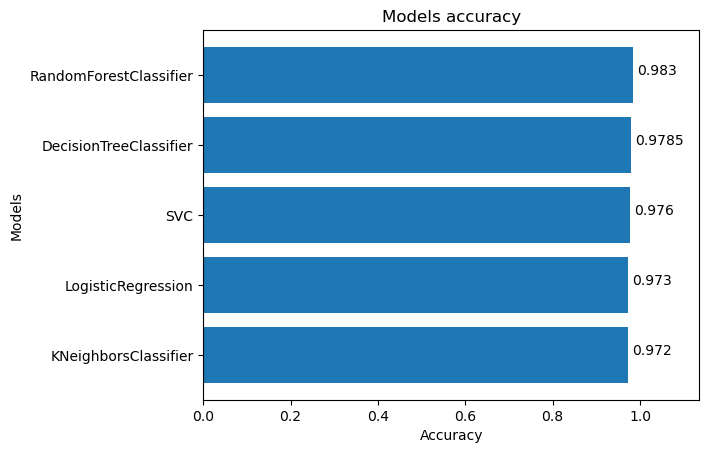

In [42]:
fig, ax = plt.subplots()
sorted_accuracy = sorted(models_metrics, key=lambda x: x[1][0])
names = [model[0] for model in sorted_accuracy]
x_values = [model[1][0] for model in sorted_accuracy]
ax.barh(names, x_values)
ax.set_xlabel("Accuracy")
ax.set_ylabel("Models")
ax.set_title("Models accuracy")
for i, value in enumerate(x_values):
    ax.text(value + 0.01, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

In [60]:
print("#----------------------------------#")
for i in range(len(sorted_accuracy)):
    matrix = sorted_accuracy[i][1][1]
    print(sorted_accuracy[i][0])
    print(f"precision: {(matrix[0][0][0] / (matrix[0][0][0] + matrix[0][0][1])):.04f}")
    print(f"recall: {(matrix[0][0][0] / (matrix[0][0][0] + matrix[0][1][0])):.04f}")
    print("#----------------------------------#")

#----------------------------------#
KNeighborsClassifier
precision: 0.9995
recall: 0.9724
#----------------------------------#
LogisticRegression
precision: 0.9954
recall: 0.9772
#----------------------------------#
SVC
precision: 0.9979
recall: 0.9778
#----------------------------------#
DecisionTreeClassifier
precision: 0.9861
recall: 0.9917
#----------------------------------#
RandomForestClassifier
precision: 0.9964
recall: 0.9862
#----------------------------------#


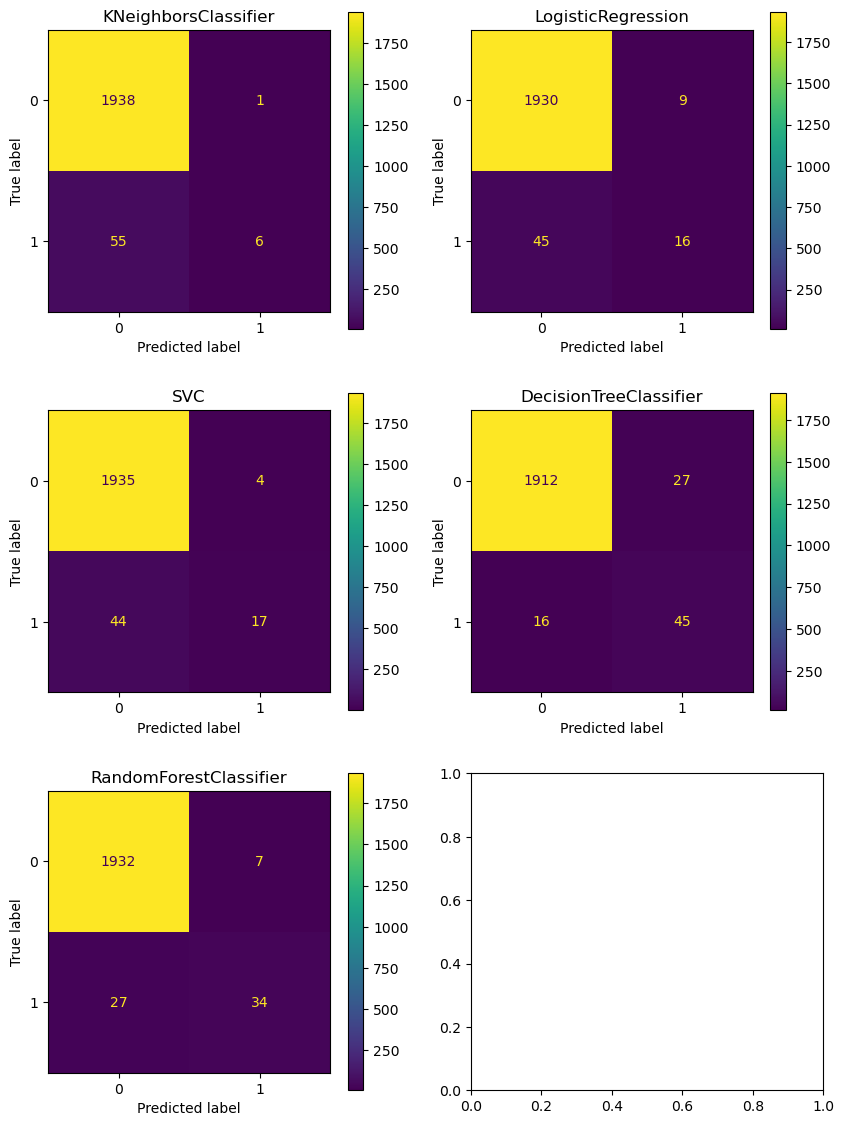

In [55]:
fig, ax = plt.subplots(3, 2, figsize=(10, 14))
k = 0
for i in range(3):
    for j in range(2):
        if k > 4:
            continue
        ax[i, j].set_title(sorted_accuracy[k][0])
        matrix = sorted_accuracy[k][1][1]
        display = ConfusionMatrixDisplay(confusion_matrix=matrix[0],
                              display_labels=matrix[1])
        display.plot(ax=ax[i, j])
        k += 1

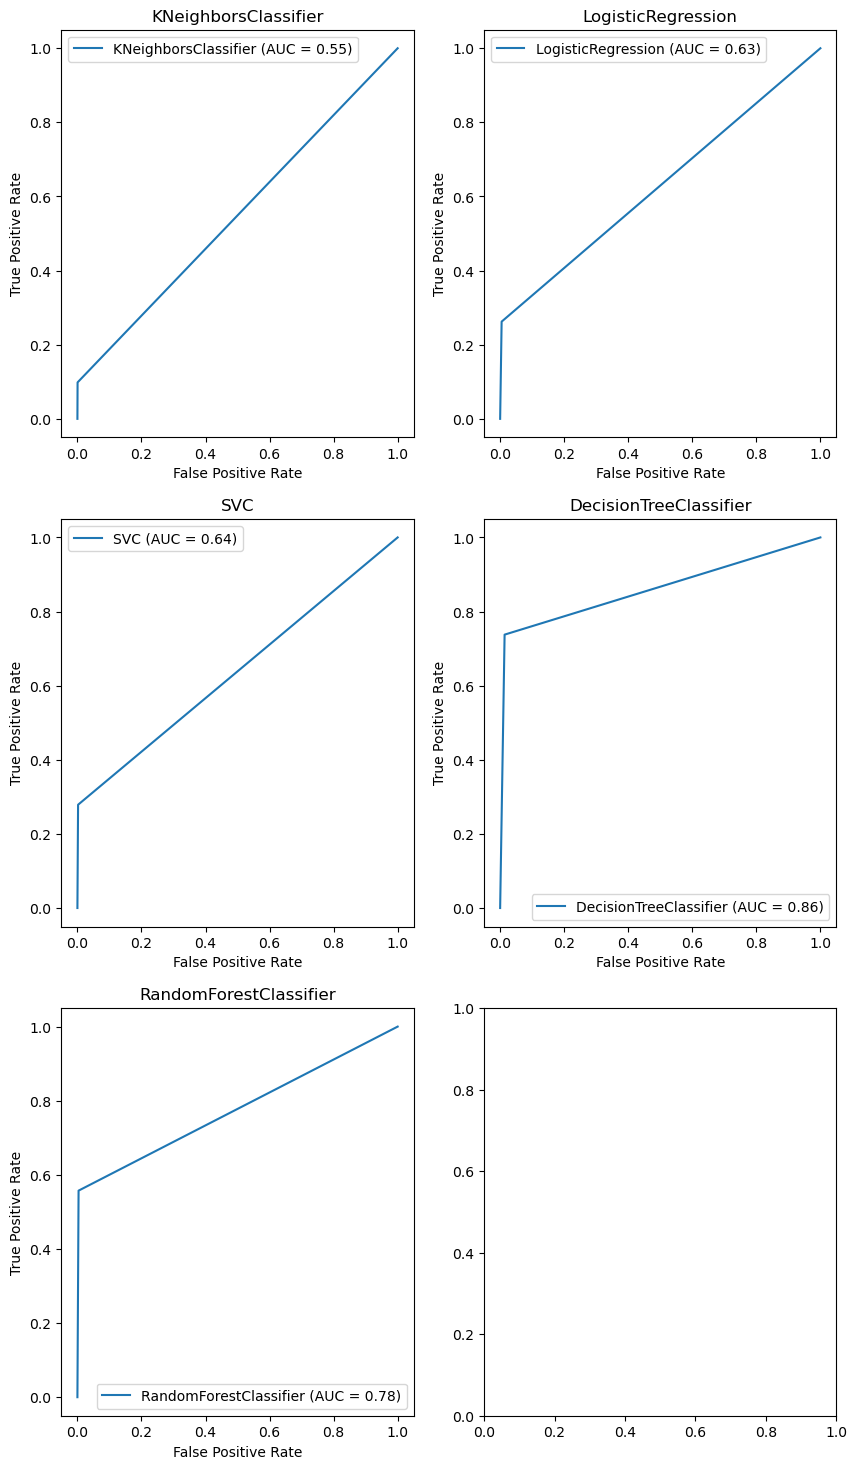

In [73]:
fig, ax = plt.subplots(3, 2, figsize=(10, 18))
k = 0
for i in range(3):
    for j in range(2):
        if k > 4:
            continue
        ax[i, j].set_title(sorted_accuracy[k][0])
        fpr, tpr, _ = sorted_accuracy[k][1][4]
        ax[i, j].plot(fpr, tpr, label=f"{sorted_accuracy[k][0]} (AUC = {sorted_accuracy[k][1][3]:.2f})", )
        ax[i, j].set_xlabel('False Positive Rate')
        ax[i, j].set_ylabel('True Positive Rate')
        ax[i, j].legend()
        k += 1

### Краткие выводы
Рассматривая метрики разных моделей, можно сделать следующий вывод: лучше всего показали себя две модели - DecisionTreeClassifier и RandomForestClassifier. Однако если рассмотреть такую метрику как recall, то можно увидеть, что DecisionTreeClassifier (`recall = 0.87 (macro avg)`) меньше пропускает реальных сбоев чем RandomForestClassifier (`recall = 0.78 (macro avg)`) в общем случае, но также она лучше и в частных случаев. В контексте нашей задачи, нам очень важно предсказывать реальные сбои, так как пропуск таких ситуации может плохо сказаться в будущем как с финансовой строны, так и с технической. Поэтому для нашего задания попробуем использовать модель `DecisionTreeClassifier`.